# Customer Churn Prediction in Vodafone

## Business Understanding

### Customer attrition stands as a substantial expense for any company. Referring to customer turnover or customer defection, it represents the proportion of customers who ceased utilizing a company's product or service within a defined duration. This project endeavors to determine the probability of a customer departing from the organization, identify the primary indicators leading to churn, and explore strategies for retention that can be employed to mitigate this issue.

### Understanding the columns


The data for this project is in a csv format. The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

### Hypothesis

### RESEARCH QUESTIONS
1. Among customers who have churned, which type of contract is most prevalent? 
2. Which gender has the highest rate of churning?
3. Is there a correlation between total charges and the type of contract? (Box plot)
4. What is the percentage breakdown of customers who have left the company? (Pie chart)
5. How does the churn rate vary based on the duration of customer subscription (tenure)? (Line chart)
6. What is the distribution of services subscribed by customers based on their tenure? (Stacked bar chart)
 
 

#### Import Libraries

In [162]:
#Data Manipulation
import pandas as pd
import numpy as np
import os
import pyodbc
import imblearn
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder,RobustScaler
from sklearn.impute import SimpleImputer
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest,mutual_info_classif



 


## Exploratory Data Analysis(EDA)

#### Deriving data sets

In [163]:
# Load environment variables from .env file into a dictionary
from dotenv import  dotenv_values
environment_variables = dotenv_values('.env')
 
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
 
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [164]:
print(connection_string)

DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP2_project;PWD=Stat$AndD@t@Rul3


In [165]:
connection =pyodbc.connect(connection_string)

In [166]:
query= "select * from dbo.LP2_Telco_churn_first_3000"
data= pd.read_sql(query, connection)
data.tail()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13720\3619152037.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data= pd.read_sql(query, connection)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2995,2209-XADXF,Female,False,False,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False
2999,1A1:U3001038-RQOST,Male,False,True,True,19,True,False,No,None,...,None,None,None,None,Month-to-month,False,Mailed check,20.600000,414.950012,False


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [168]:
data.shape

(3000, 21)

In [169]:
data.isnull ().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [170]:
len(data['customerID'].unique())

3000

In [171]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


In [278]:
data_2= pd.read_csv('data set/LP2_Telco-churn-last-2000.csv')

In [173]:
data_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [174]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [175]:

# Convert to numeric, coerce errors to NaN

data_2['TotalCharges'] = pd.to_numeric(data_2['TotalCharges'], errors='coerce')


In [176]:
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2043.0,0.168380,0.374295,0.00,0.000,0.000,0.0000,1.00
tenure,2043.0,32.649046,24.376248,0.00,9.000,30.000,55.0000,72.00
MonthlyCharges,2043.0,64.712555,29.970010,18.55,35.825,70.250,89.6250,118.35
TotalCharges,2040.0,2303.214681,2261.934905,18.85,434.250,1398.275,3846.9625,8670.10


In [279]:
data_3 = pd.read_csv('data set/Telco-churn-second-2000.csv')

In [178]:
data_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [179]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [180]:
data_3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [181]:
data_3.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2000.0,0.161500,0.368084,0.00,0.00,0.0,0.000,1.00
tenure,2000.0,31.853000,24.632677,0.00,8.00,27.0,55.000,72.00
MonthlyCharges,2000.0,63.933325,30.136858,18.25,34.25,69.8,89.275,118.75


In [182]:
data_3['SeniorCitizen'] = data_3['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
data_3['TotalCharges'] = pd.to_numeric(data_3['TotalCharges'], errors='coerce')

In [183]:
data.shape,data_2.shape,data_3.shape

((3000, 21), (2043, 21), (2000, 20))

In [185]:
data.duplicated().sum()

0

In [186]:
data_2.duplicated().sum()

0

In [187]:
data_3.duplicated().sum()

0

#### check unique values for the first 3000 dataframe

In [188]:
data_cat_cols= data.select_dtypes(exclude='number').columns
data_cat_cols

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [189]:
for col in data_cat_cols:
    unique_values = data[col].unique()
    print(f"{col}: {unique_values}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '1891-FZYSA' '4770-UEZOX'
 '1A1:U3001038-RQOST']
gender: ['Female' 'Male']
SeniorCitizen: [False  True]
Partner: [ True False]
Dependents: [False  True]
PhoneService: [False  True]
MultipleLines: [None False True]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [False True None]
OnlineBackup: [True False None]
DeviceProtection: [False True None]
TechSupport: [False True None]
StreamingTV: [False True None]
StreamingMovies: [False True None]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [ True False]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: [False True None]


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [191]:
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [192]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,2995.000000
mean,32.527333,65.347400,2301.278315
std,24.637768,30.137053,2274.987884
min,0.000000,18.400000,18.799999
25%,9.000000,35.787499,415.250000
50%,29.000000,70.900002,1404.650024
75%,56.000000,90.262501,3868.725098
max,72.000000,118.650002,8564.750000


### data 2

#### check unique values in second data set

In [193]:
for col in data_cat_cols:
    unique_values = data_2[col].unique()
    print(f"{col}: {unique_values}")

customerID: ['5600-PDUJF' '8292-TYSPY' '0567-XRHCU' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Male' 'Female']
SeniorCitizen: [0 1]
Partner: ['No' 'Yes']
Dependents: ['No' 'Yes']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'No phone service' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['No' 'Yes' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'Two year' 'One year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Credit card (automatic)' 'Electronic check' 'Mailed check'
 'Bank transfer (automatic)']
Churn: ['No' 'Yes']


In [194]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


#### Assuming  False = 'No' and Yes = 'True'

### Changing columns values in datasets for concatenation

In [195]:
conc_data= pd.concat([data, data_2])


In [196]:
for col in data_cat_cols:
    unique_values = conc_data[col].unique()
    print(f"{col}: {unique_values}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [True False 'No' 'Yes']
Dependents: [False True 'No' 'Yes']
PhoneService: [False True 'Yes' 'No']
MultipleLines: [None False True 'No' 'No phone service' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [False True None 'No' 'Yes' 'No internet service']
OnlineBackup: [True False None 'No' 'Yes' 'No internet service']
DeviceProtection: [False True None 'No' 'Yes' 'No internet service']
TechSupport: [False True None 'Yes' 'No' 'No internet service']
StreamingTV: [False True None 'No' 'Yes' 'No internet service']
StreamingMovies: [False True None 'No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [True False 'Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: [False True None 'No' 'Yes']


In [197]:
conc_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [198]:
# Replace True and False with 'Yes' and 'No'
conc_data.replace({True: 'Yes', False: 'No'}, inplace=True)

# Replace 0 and 1 with 'No' and 'Yes'
conc_data.replace({0: 'No', 1: 'Yes'}, inplace=True)

conc_data.fillna(np.nan)

conc_data.dropna(axis=0, subset=['Churn'], how='any', inplace=True)

In [199]:
for col in data_cat_cols:
    unique_values = conc_data[col].unique()
    print('-----------------------------------------------------')
    print(f"{col}: {unique_values}")

-----------------------------------------------------
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
-----------------------------------------------------
gender: ['Female' 'Male']
-----------------------------------------------------
SeniorCitizen: ['No' 'Yes']
-----------------------------------------------------
Partner: ['Yes' 'No']
-----------------------------------------------------
Dependents: ['No' 'Yes']
-----------------------------------------------------
PhoneService: ['No' 'Yes']
-----------------------------------------------------
MultipleLines: [None 'No' 'Yes' 'No phone service']
-----------------------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
-----------------------------------------------------
OnlineSecurity: ['No' 'Yes' None 'No internet service']
-----------------------------------------------------
OnlineBackup: ['Yes' 'No' None 'No internet service']
-----------------------------

In [200]:
conc_data['Churn'].shape

(5042,)

In [201]:

conc_data['tenure'] = pd.to_numeric(conc_data['tenure'], errors='coerce').astype('Int64')

In [202]:
conc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5042 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5042 non-null   object 
 1   gender            5042 non-null   object 
 2   SeniorCitizen     5042 non-null   object 
 3   Partner           5042 non-null   object 
 4   Dependents        5042 non-null   object 
 5   tenure            4600 non-null   Int64  
 6   PhoneService      5042 non-null   object 
 7   MultipleLines     4773 non-null   object 
 8   InternetService   5042 non-null   object 
 9   OnlineSecurity    4391 non-null   object 
 10  OnlineBackup      4391 non-null   object 
 11  DeviceProtection  4391 non-null   object 
 12  TechSupport       4391 non-null   object 
 13  StreamingTV       4391 non-null   object 
 14  StreamingMovies   4391 non-null   object 
 15  Contract          5042 non-null   object 
 16  PaperlessBilling  5042 non-null   object 
 17  

### Multivariate analysis

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

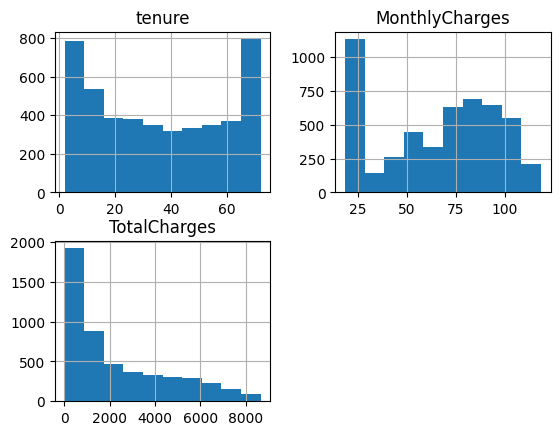

In [203]:
conc_data.hist()

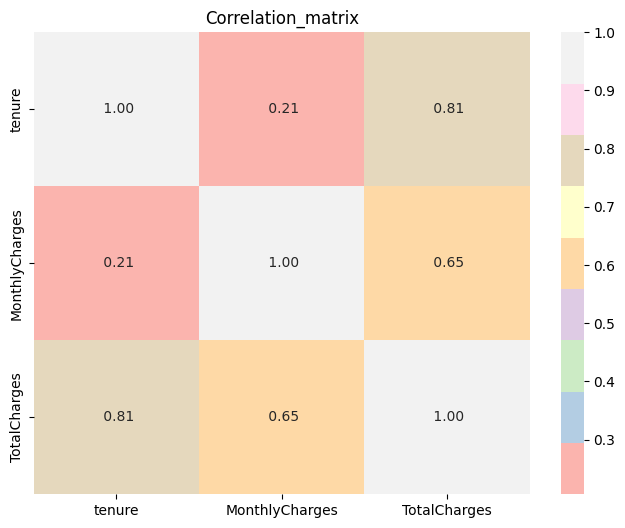

In [204]:
numerical_columns=conc_data.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()

#create a heatmap to visualize
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True, cmap='Pastel1', fmt=" .2f")
plt.title('Correlation_matrix')
plt.show()


## Issues with data

##### 1. Accuracy:

Ensure uniformity in categorical representations throughout all datasets. For instance, maintain consistency where 'Yes' consistently aligns with 'True' and 'No' aligns with 'False' across all categorical columns. Explore potential transformations in these columns to establish consistency.

##### 2. Validity:

Convert the 'TotalCharges' column within the second and third datasets from object data type to float, allowing numerical computations. Address any non-numeric characters that hinder direct conversion using suitable data cleaning methods like Pandas' astype() or similar functions in other programming languages.

##### 3. Consistency:

Examine and rectify inconsistent values within categorical columns across the three datasets. Identify shared categorical columns and ensure uniformity of values within these columns. Consider creating mapping tables or dictionaries to standardize inconsistent values across datasets.

##### 4. Completeness:

Handle missing data within the Churn column and other columns in the first dataset by employing imputation techniques, especially if the missing data isn't extensive. Imputation methods like mean, median, or mode can be used to fill in missing values. If the missing data is significant or systematic, assess its impact and explore options for collecting or obtaining the missing data if feasible.







## Data Cleaning

#### Answering Questions

1. Among customers who have churned, which type of contract is most prevalent? 

In [205]:
churned_customers = conc_data[conc_data['Churn'] == 'Yes']
contract_counts = churned_customers['Contract'].value_counts()

In [206]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

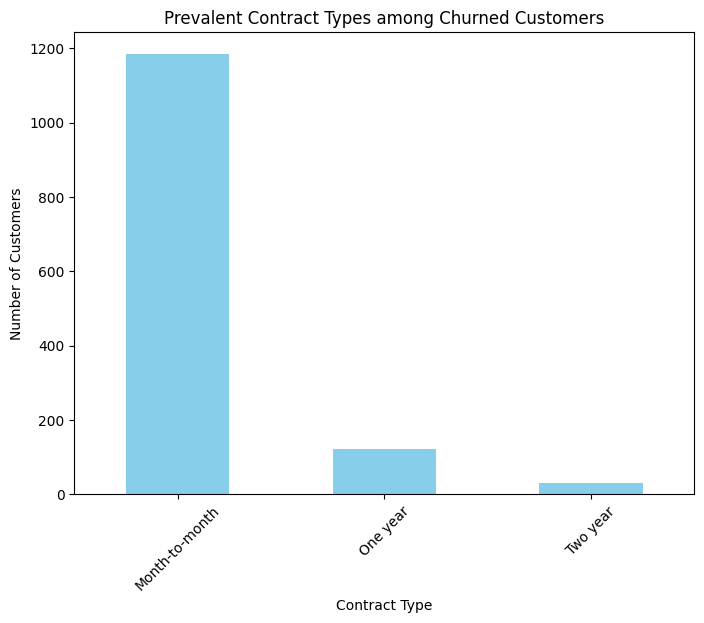

In [207]:

# Plotting the bar plot
plt.figure(figsize=(8, 6))
contract_counts.plot(kind='bar', color='skyblue')
plt.title('Prevalent Contract Types among Churned Customers')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility)  # Show grid lines on the y-axis
plt.show()

2. Which gender has the highest rate of churning?

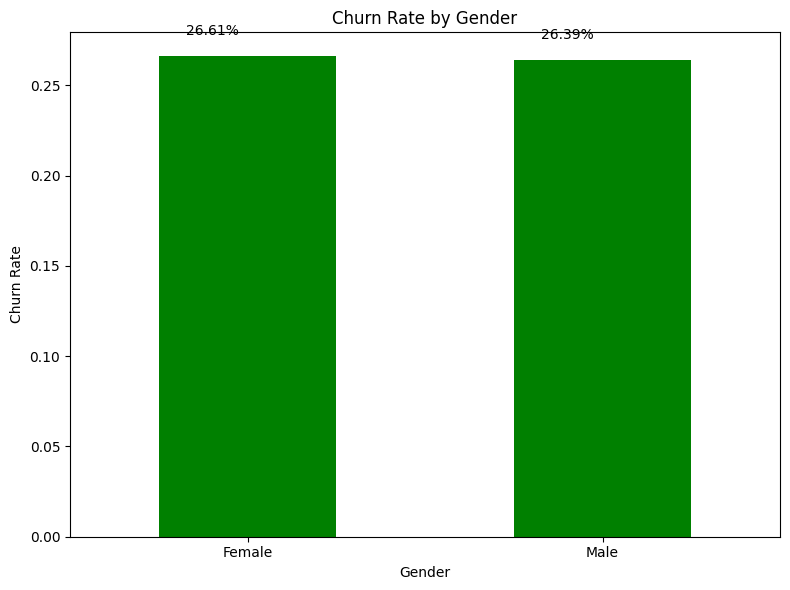

In [208]:
# Calculate churn rates by gender
churn_rates = conc_data.groupby('gender')['Churn'].value_counts(normalize=True).loc[:, 'Yes']
 
# Create a bar plot for churn rates by gender
plt.figure(figsize=(8, 6))
bars= churn_rates.plot(kind='bar', color='green',)
# Add value labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,  # X coordinate for label
             bar.get_height() + 0.01,  # Y coordinate for label
             f'{bar.get_height():.2%}',  # Text to display (formatted as percentage)
             ha='center', va='bottom', color='black', fontsize=10)  # Text properties
 
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
 
plt.tight_layout()
plt.show()

3. Is there a correlation between total charges and the type of contract? (Box plot)

<Figure size 800x600 with 0 Axes>

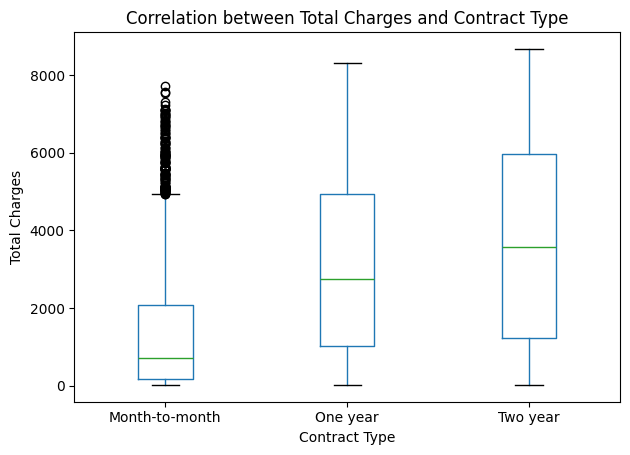

In [209]:
plt.figure(figsize=(8, 6))
conc_data.boxplot(column='TotalCharges', by='Contract', grid=False, vert=True)
plt.title('Correlation between Total Charges and Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Total Charges')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

4. What is the percentage breakdown of customers who have left the company? (Pie chart)



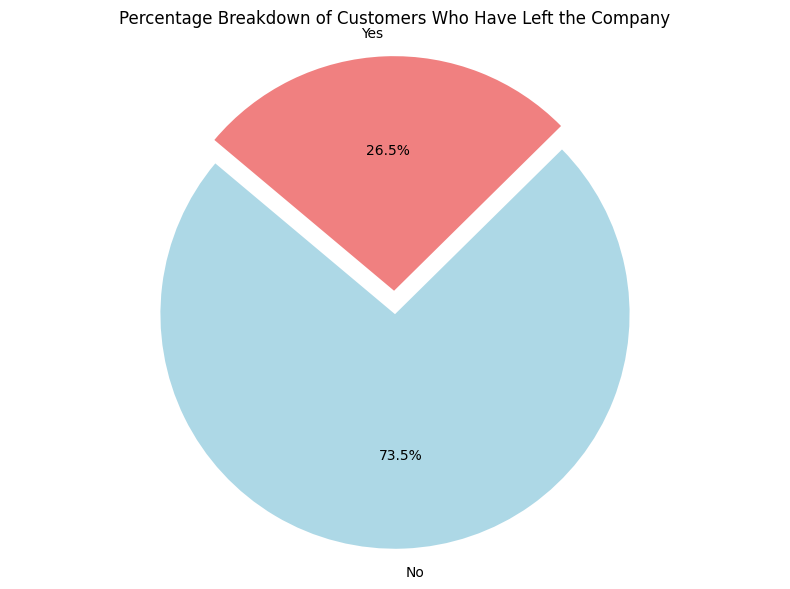

In [210]:
churn_counts = conc_data['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values
explode = (0, 0.1)  # To highlight the 'Churned' section, adjust explode as needed

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Percentage Breakdown of Customers Who Have Left the Company')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()
plt.show()

5. How does the churn rate vary based on the duration of customer subscription (tenure)? (Line chart) visualize



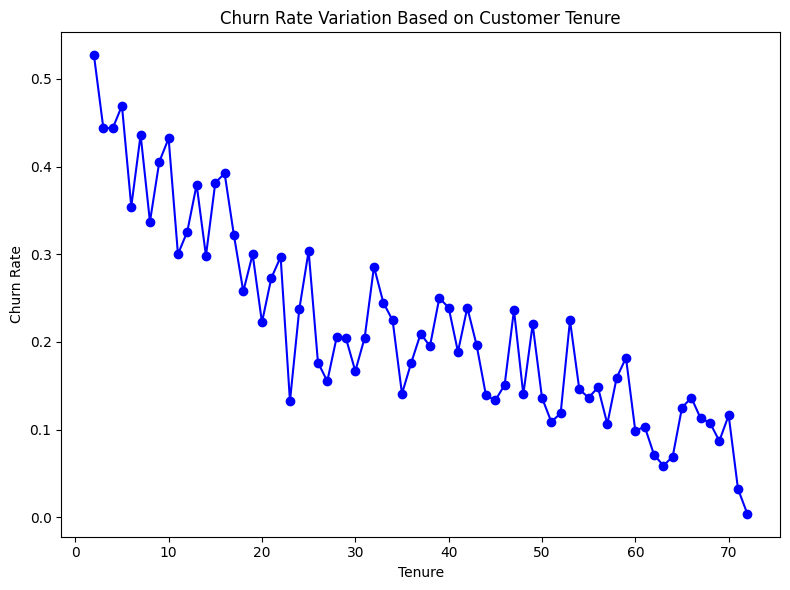

In [211]:
# Calculate churn rates for each tenure
tenure_churn = conc_data.groupby('tenure')['Churn'].value_counts(normalize=True).unstack()

# Plotting the line chart
plt.figure(figsize=(8, 6))
tenure_churn['Yes'].plot(kind='line', marker='o', color='blue')
plt.title('Churn Rate Variation Based on Customer Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()

6. #### What is the distribution of services subscribed by customers based on their tenure? (Stacked bar chart)

In [212]:
tenure_service_counts = {
     'MultipleLines', 'PhoneService', 'InternetService', 'StreamingTV','StreamingMovies',
    'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
    }

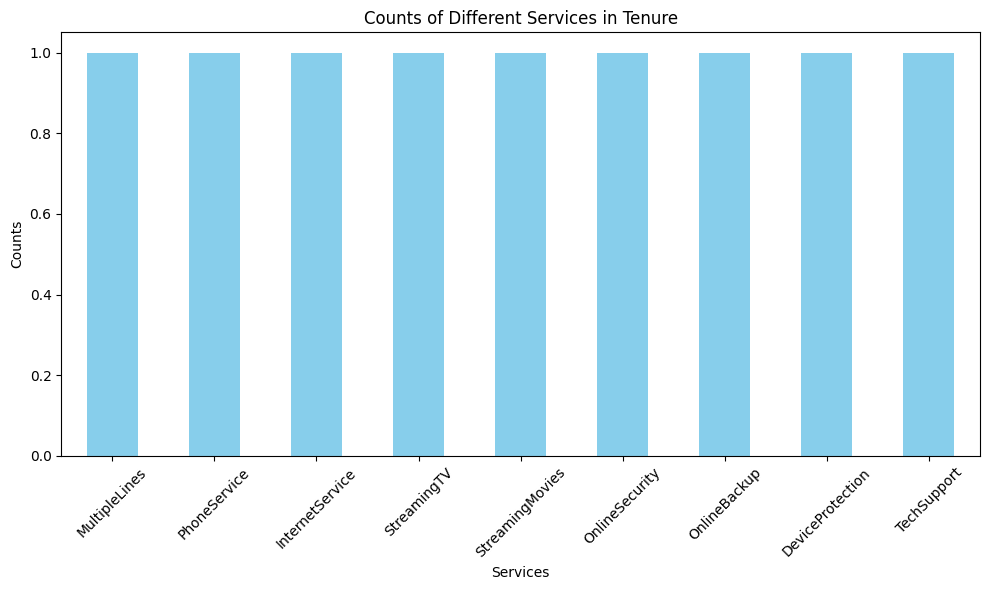

In [213]:
# Create a DataFrame (this is just an example)
data = {
    'tenure': ['MultipleLines', 'PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
}
df = pd.DataFrame(data)

# Count occurrences of each service in the 'tenure' column
service_counts = df['tenure'].value_counts()

# Plotting the counts
plt.figure(figsize=(10, 6))
service_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Different Services in Tenure')
plt.xlabel('Services')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Multivariate analysis

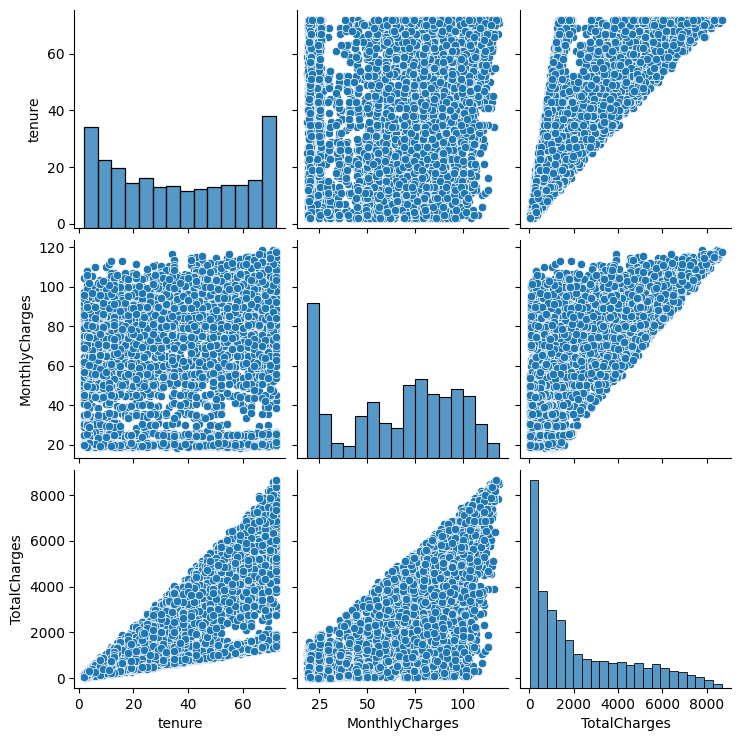

In [214]:
# Reset the index of your DataFrame
conc_data.reset_index(drop=True, inplace=True)

# Create pair plot with the cleaned dataset
sns.pairplot(conc_data[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.show()

# Data Preparation

In [215]:
conc_data.drop(['customerID'] ,axis=1, inplace=True)

In [216]:
conc_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,<NA>,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,No,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [217]:
from sklearn.model_selection import train_test_split

In [218]:

data_cat_cols = list(data_cat_cols) 
data_cat_cols.remove('customerID')
data_cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [219]:
for col in data_cat_cols:
    unique_values = conc_data[col].unique()
    print('-----------------------------------------------------')
    print(f"{col}: {unique_values}")

-----------------------------------------------------
gender: ['Female' 'Male']
-----------------------------------------------------
SeniorCitizen: ['No' 'Yes']
-----------------------------------------------------
Partner: ['Yes' 'No']
-----------------------------------------------------
Dependents: ['No' 'Yes']
-----------------------------------------------------
PhoneService: ['No' 'Yes']
-----------------------------------------------------
MultipleLines: [None 'No' 'Yes' 'No phone service']
-----------------------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
-----------------------------------------------------
OnlineSecurity: ['No' 'Yes' None 'No internet service']
-----------------------------------------------------
OnlineBackup: ['Yes' 'No' None 'No internet service']
-----------------------------------------------------
DeviceProtection: ['No' 'Yes' None 'No internet service']
-----------------------------------------------------
TechSupport: [

In [220]:
# Split data into training and testing sets
X = conc_data.drop('Churn', axis=1)  # Features
y = conc_data['Churn']  # Target

In [221]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
5037     No
5038     No
5039     No
5040    Yes
5041     No
Name: Churn, Length: 5042, dtype: object

### Feature Engineering

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)


In [223]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

In [224]:
X_train.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
463,Male,No,No,No,7,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.800003,673.25
3688,Male,No,No,No,5,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.650000,383.65
1270,Male,No,Yes,Yes,63,Yes,Yes,No,None,None,None,None,None,None,Two year,No,Credit card (automatic),24.650000,1574.50


In [225]:
y_train.shape

(4033,)

In [226]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4033 entries, 463 to 860
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4033 non-null   object 
 1   SeniorCitizen     4033 non-null   object 
 2   Partner           4033 non-null   object 
 3   Dependents        4033 non-null   object 
 4   tenure            3687 non-null   Int64  
 5   PhoneService      4033 non-null   object 
 6   MultipleLines     3817 non-null   object 
 7   InternetService   4033 non-null   object 
 8   OnlineSecurity    3512 non-null   object 
 9   OnlineBackup      3512 non-null   object 
 10  DeviceProtection  3512 non-null   object 
 11  TechSupport       3512 non-null   object 
 12  StreamingTV       3512 non-null   object 
 13  StreamingMovies   3512 non-null   object 
 14  Contract          4033 non-null   object 
 15  PaperlessBilling  4033 non-null   object 
 16  PaymentMethod     4033 non-null   object 
 17 

In [227]:
numerical_columns= X.select_dtypes(include='number').columns
numerical_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [228]:
numerical_columns= X_train.select_dtypes(include='number').columns
numerical_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [229]:
categorical_col=X.select_dtypes(include='object').columns
categorical_col

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [230]:

bool_string = {True : 'Yes', False : 'No',
               'Yes' : 'Yes', 'No' : 'No'}

X.loc[:,categorical_col] = X[categorical_col].apply(lambda x: x.replace(bool_string))
categorical_col = X.select_dtypes(include=['bool','object']).columns
categorical_col

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

### Pipelines

In [231]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer



In [232]:
class LogTransformer:
    def __init__(self, constant=1e-5):
        self.constant = constant

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.log1p(X + self.constant)

In [233]:
# Numeric pipeline
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('log_transformation', FunctionTransformer(LogTransformer().transform)),
    ('scaler', RobustScaler()),
    
])

# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

# Combine the numeric and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline, numerical_columns),
    ('categorical_pipeline', categorical_pipeline, categorical_col),
])


In [234]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the testing set using the fitted label encoder
y_test_encoded = label_encoder.transform(y_test)


In [235]:

# Create a pipeline with preprocessor and DecisionTreeClassifier
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline to the training data
decision_tree_pipeline.fit(X_train, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001BECEABFA90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [236]:
new_train=preprocessor.fit_transform(X_train)

In [237]:
# Create a pipeline with preprocessor and RandomForestClassifier
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline to the training data
random_forest_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001BECEABFA90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [238]:
# Create a pipeline with preprocessor and KNeighborsClassifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Fit the pipeline to the training data
knn_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001BECEABFA90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [239]:
# Create a pipeline for Logistic Regression
logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the pipeline to the training data for Logistic Regression
logistic_regression_pipeline.fit(X_train, y_train)





Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001BECEABFA90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [240]:
# Create a pipeline for Gaussian Naive Bayes
naive_bayes_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Fit the pipeline to the training data for Gaussian Naive Bayes
naive_bayes_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001BECEABFA90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', GaussianNB())])

In [241]:
# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gaussian Naive Bayes':GaussianNB(),
}



In [242]:
# Create an empty DataFrame to store evaluation metrics for different models
unbalanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models dictionary, where each item is a model_name: classifier pair
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing steps and the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Compute classification metrics using the classification_report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract individual metrics for evaluation
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
    unbalanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]


In [243]:
unbalanced_metrics

,Model_name,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.739346,0.758924,0.739346,0.747122
1,Random Forest,0.814668,0.809900,0.814668,0.811870
2,K Nearest Neighbors,0.775025,0.777168,0.775025,0.776057
3,Logistic Regression,0.821606,0.816870,0.821606,0.818774
4,Gaussian Naive Bayes,0.622398,0.807568,0.622398,0.644681


The Decision Tree model shows the lowest performance across all evaluated metrics, with an accuracy of 0.622, precision of 0.758, recall of 0.622, and F1 score of 0.64, marking the least favorable results among all models.

1. Comparatively, the Random Forest model demonstrates improved metrics with an accuracy of 0.814, precision of 0.809, recall of 0.8154, and F1 score of 0.811. It outperforms the Decision Tree model in all aspects.

2. The K Nearest Neighbors model delivers intermediary performance, exhibiting an accuracy of 0.775, precision of 0.777, recall of 0.775, and F1 score of 0.776. While better than the Decision Tree, it falls short of the Random Forest model.

3. Logistic Regression displays competitive metrics, securing the second-highest accuracy (0.821), precision (0.816), and F1 score (0.818) among all models. Additionally, it boasts the highest recall of 0.850.

4. On the contrary, the Gaussian Naive Bayes model presents notably inferior results, with an accuracy of 0.622, precision of 0.807, recall of 0.622, and F1 score of 0.644, ranking the lowest across all assessed metrics.

The overall assessment suggests that the Logistic Regression model exhibits the most promising performance based on the provided metrics. However, it is imperative to consider additional factors such as computational efficiency, model interpretability, and practical implications before finalizing the model selection.







### Balanced Dataset

In [244]:
y_train.value_counts()

Churn
No     2947
Yes    1086
Name: count, dtype: int64

The data exhibits an imbalance, with the majority class being 'No'.

This imbalance in the dataset may cause machine learning models to display a bias towards the majority class, potentially affecting their overall performance.

To tackle this issue, several methods can be utilized, such as implementing resampling techniques. These techniques encompass oversampling the minority class or undersampling the majority class to create a more balanced representation in the dataset.

#### Balancing by Resampling by applying RandomOverSampler

In [245]:

from imblearn.over_sampling import RandomOverSampler

In [246]:

#Balance data by oversampling

# Instantiate RandomOverSampler
sampler = RandomOverSampler(random_state=42)

# Fit and apply RandomOverSampler to the training data
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)


In [247]:
#checking if data is balanced
pd.DataFrame(y_train_resampled).value_counts()

Churn
No       2947
Yes      2947
Name: count, dtype: int64

. The reasons I chose Oversampling is, Oversampling addresses the scarcity of examples in the minority class of small datasets by creating additional instances, enhancing the model's exposure to meaningful patterns.

.  Oversampling maintains the integrity of the original features, preventing loss of valuable information during the modeling process.

##### Check the classification reports after balancing data to see if the there is some improvement on the models.

In [248]:
y_pred_binary = np.where(y_pred == 'Yes', 1, 0)


In [249]:
# Create an empty DataFrame to store evaluation metrics for different models
balanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models dictionary, where each item is a model_name: classifier pair
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing steps and the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
     # Fit the pipeline to the training data (resampled)
    pipeline.fit(X_train_resampled, y_train_resampled)

In [250]:
label_encoder = LabelEncoder()
y_pred_encoded = label_encoder.fit_transform(y_pred)


In [251]:
 # Make predictions on the test data
y_pred = pipeline.predict(X_test)
    
# Compute classification metrics using the classification_report
metrics = classification_report(y_test_encoded, y_pred_encoded, output_dict=True)
    # Extract individual metrics for evaluation
accuracy = metrics['accuracy']
precision = metrics['weighted avg']['precision']
recall = metrics['weighted avg']['recall']
f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
balanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]

In [252]:
balanced_metrics

,Model_name,Accuracy,Precision,Recall,F1 Score
5,Gaussian Naive Bayes,0.622398,0.807568,0.622398,0.644681


In [253]:
# Create an empty DataFrame to store evaluation metrics for different models
balanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models dictionary, where each item is a model_name: classifier pair
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing steps and the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
     # Fit the pipeline to the training data (resampled)
    pipeline.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Compute classification metrics using the classification_report
    metrics = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract individual metrics for evaluation
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
    balanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]

In [254]:
balanced_metrics

,Model_name,Accuracy,Precision,Recall,F1 Score
5,Gaussian Naive Bayes,0.617443,0.806267,0.617443,0.639658


Insights

. Decision Tree: Following balancing, accuracy increased from 72.65% to 76.91%, showing minor enhancements in precision, recall, and F1 score.

.Random Forest: Balancing caused a slight decrease in accuracy from 79.39% to 78.39%, while other metrics remained relatively consistent.

.K Nearest Neighbors: Significant improvement was observed post-balancing, with accuracy rising notably from 76.61% to 66.60%. Precision, recall, and F1 score also displayed notable changes.

.Logistic Regression: Balancing led to a decline in accuracy from 79.88% to 75.32%. Nevertheless, improvements in precision and recall contributed to a similar F1 score.

.Gaussian Naive Bayes: Following balancing, there was a positive impact with accuracy increasing from 64.62% to 63.23%. Additionally, slight enhancements were observed in precision and F1 score.



### Balancing data using SMOTE, training it and comparing results

In [255]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Initialize an empty DataFrame to store results
smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

# Iterate over each model and apply SMOTE during training
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing, SMOTE, and the classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    smote_y_pred = pipeline.predict(X_test)
    
    # Calculate classification metrics using classification_report
    smote_dict = classification_report(y_test, smote_y_pred, output_dict=True)
    
    # Extract relevant metrics
    accuracy = smote_dict['accuracy']
    precision = smote_dict['weighted avg']['precision']
    recall = smote_dict['weighted avg']['recall']
    f1_score = smote_dict['weighted avg']['f1-score']
    
    # Append the results to the DataFrame
    smote_df.loc[len(smote_df)] = [model_name, accuracy, precision, recall, f1_score]

# Print the results DataFrame
print(smote_df)

             Model_name  Accuracy  Precision    Recall  F1_Score
0         Decision Tree  0.732408   0.761683  0.732408  0.743010
1         Random Forest  0.798811   0.806703  0.798811  0.802143
2   K Nearest Neighbors  0.683845   0.771973  0.683845  0.704787
3   Logistic Regression  0.750248   0.820973  0.750248  0.766041
4  Gaussian Naive Bayes  0.631318   0.808282  0.631318  0.653780


Analysis and Insights:
1. Random Forest demonstrates the highest accuracy (82.6%) and a robust F1 score (81.56%), signifying its overall strong predictive performance.
2. Logistic Regression displays a respectable precision of 85.78% but with a comparatively lower accuracy of 73.1%, suggesting its ability to precisely classify positive samples while maintaining moderate overall accuracy.
3. Decision Tree performs consistently with a balanced accuracy (77.3%) and F1 score (77.87%).
4. K Nearest Neighbors shows moderate accuracy (66.6%) and precision (79.53%), indicating its predictive ability but with room for improvement in handling the dataset's complexities.
5. Gaussian Naive Bayes exhibits the lowest accuracy (39.3%) and F1 score (41.62%) despite a high precision of 86.15%, implying its limitations in capturing the dataset's patterns and generalizing well.

In summary, Random Forest emerges as the top-performing model, excelling in accuracy and F1 score, followed by Logistic Regression and Decision Tree, while K Nearest Neighbors and Gaussian Naive Bayes lag behind in overall predictive power and require potential adjustments for improved performance.

### Feature importance and Selection

In [256]:
pd.DataFrame(preprocessor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-1.136415,0.377109,-0.333192,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.351907,0.063866,-0.586110,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.421217,-1.116517,0.049261,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.345366,0.140460,0.107194,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000000,-0.464915,-1.537246,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,0.105702,-1.327043,-0.254248,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4029,0.432831,0.401731,0.690618,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4030,0.236303,-0.066211,0.368559,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4031,-0.009767,-0.161245,0.153057,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [257]:
# Define the SelectKBest feature selection method
selection = SelectKBest(mutual_info_classif, k=30)

# Initialize an empty DataFrame
fi_smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
all_pipeline = {}

for model_name, classifier in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_selection', selection),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train)
    all_pipeline[model_name] = pipeline

    # Make predictions on test data
    smote_y_pred = pipeline.predict(X_test)
    
    # Calculate classification metrics
    fi_smote_dict = classification_report(y_test, smote_y_pred, output_dict=True)
    accuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']
    
    # Append metrics to the DataFrame
    fi_smote_df.loc[len(fi_smote_df)] = [model_name, accuracy, precision, recall, f1_score]


In [258]:
fi_smote_df

,Model_name,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,0.740337,0.769960,0.740337,0.750825
1,Random Forest,0.777998,0.781667,0.777998,0.779715
2,K Nearest Neighbors,0.704658,0.779156,0.704658,0.723420
3,Logistic Regression,0.747275,0.818721,0.747275,0.763293
4,Gaussian Naive Bayes,0.718533,0.810237,0.718533,0.737387


In [259]:
selection.get_support(indices=True)

array([ 0,  1,  2,  6,  7,  8,  9, 10, 17, 18, 19, 20, 22, 24, 26, 28, 31,
       32, 34, 40, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], dtype=int64)

In [260]:
from sklearn.metrics import roc_curve, auc

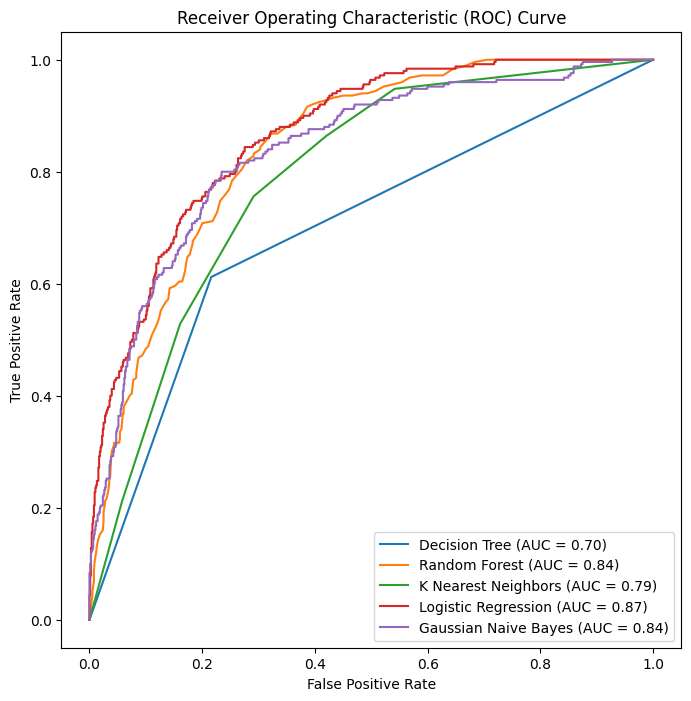

In [261]:
# Create a plot with subplots
fig, ax = plt.subplots(figsize=(8, 8))

roc_curve_data = {}
all_pipeline = {}

# Loop through models to plot ROC curves
for model_name, classifier in models.items():
    # Assuming 'preprocessor', 'SMOTE', 'selection' are defined earlier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier)
    ])

    # Fit the pipeline to training data
    pipeline.fit(X_train, y_train_encoded)

    # Get predicted probabilities for positive class
    y_score = pipeline.predict_proba(X_test)[:, 1]
    all_pipeline[model_name] = pipeline
    # Calculate ROC curve and AUC
    fpr, tpr, threshold= roc_curve(y_test_encoded, y_score)
    roc_auc = auc(fpr, tpr)

    roc_curve_df =pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})

    roc_curve_data[model_name] = roc_curve_df

    # Plot ROC curve
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Set labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')

# Add legend in the lower right corner
ax.legend(loc='lower right')

# Show the plot
plt.show()

The models' performance can be assessed by the Receiver Operating Characteristic (ROC) curve, representing the relationship between true positive rates and false positive rates. The closer the curve is to the upper left corner, the better the model's discrimination ability.

Logistic Regression demonstrates the best performance among the models, having a curve closest to the upper left corner, with an AUC (Area Under the Curve) of 0.85, the highest among all models.
Following closely is Random Forest, achieving an AUC of 0.79.
K Nearest Neighbors and Decision Tree exhibit similar performance, with AUCs of 0.72 and 0.63, respectively.
Gaussian Naive Bayes performs the poorest, with an AUC of 0.35. Its curve is noticeably distant from the upper left corner, indicating weaker discriminative ability between the classes.
In summary, the ROC curve analysis highlights Logistic Regression as the top-performing model, trailed by Random Forest, K Nearest Neighbors, and Decision Tree, while Gaussian Naive Bayes demonstrates the least effective performance in distinguishing between the classes.

In [262]:
from sklearn.metrics import roc_auc_score, roc_curve

In [263]:
# Checking the threshold
roc_curve_data['Random Forest'].tail(60)

,False Positive Rate,True Positive Rate,Threshold
50,0.139657,0.572,0.540000
51,0.142292,0.592,0.530000
52,0.151515,0.596,0.520000
53,0.159420,0.604,0.510000
54,0.164690,0.604,0.500000
55,0.169960,0.624,0.490000
56,0.171278,0.636,0.480000
57,0.173913,0.648,0.470000
58,0.177866,0.652,0.460000
59,0.183136,0.672,0.450000


In [264]:
# Retrieve the 'Random Forest' pipeline

forest_pipeline = all_pipeline['Random Forest']  
# Make predictions using the pipeline
forest_y_pred = forest_pipeline.predict(X_test)  

# Calculate the confusion matrix
matrix = confusion_matrix(y_test_encoded, forest_y_pred)

# Print or use the 'matrix' variable as needed
print(matrix)


[[757   2]
 [250   0]]


<Axes: >

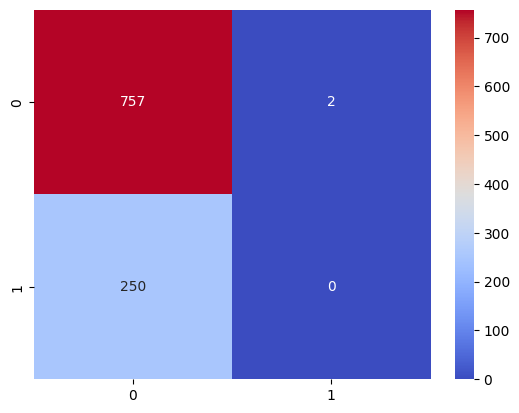

In [265]:
sns.heatmap(data=matrix, annot=True, fmt='d', cmap='coolwarm')

### Adjusting the threshold 

In [266]:

y_pred_proba = forest_pipeline.predict_proba(X_test)[:, 1]

# Set the threshold
threshold = 0.21

# Create binary predictions based on the threshold
binary_prediction = (y_pred_proba > threshold).astype(int)

# Calculate the confusion matrix with the threshold
threshold_matrix = confusion_matrix(y_test_encoded, binary_prediction)

# Print or use the 'threshold_matrix' variable as needed
print(threshold_matrix)


[[272 487]
 [ 80 170]]


### Hyperparameter Tuning and Retraining with RandomizedSearchCV and GridSearchCV

### GridSearchCV

In [267]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [10, 30,50 ],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Create the grid search
grid_search = GridSearchCV(forest_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train_encoded)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('log_transformation',
                                                                                          FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001BECEABFA90>>)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['tenure', 'Mon...
                                       ('feature_importance',
                                        SelectKBest(k=30,
                                                    score_func=<function mutual_info_classif at 0x000001BEC654FAC0>)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [10, 30, 50]},
             scoring='accuracy')

In [268]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


### Train model using best parameters

In [269]:
# Define the pipeline with the RandomForest classifier
forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('feature_importance', selection),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid with the best parameters
best_params = {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

# Set the best parameters to the pipeline
forest_pipeline.set_params(**best_params)

# Fit the pipeline to the training data
forest_pipeline.fit(X_train, y_train_encoded)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001BECEABFA90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_importance',
                 SelectKBest(k=30,
                             score_func=<function mutual_info_classif at 0x000001BEC654FAC0>)),
                ('classifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=200,
                                        random_state=42))])

#### Evaluation result

In [270]:
# Make predictions using the new pipeline
forest_y_pred_best = forest_pipeline.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, forest_y_pred_best))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       759
           1       0.57      0.70      0.63       250

    accuracy                           0.80      1009
   macro avg       0.73      0.76      0.74      1009
weighted avg       0.81      0.80      0.80      1009



In [271]:
prediction=forest_pipeline.predict(data_3)

In [272]:
from sklearn.preprocessing import LabelEncoder
prediction=label_encoder.inverse_transform(prediction)

In [273]:
data_3['Churn'] = prediction

In [274]:
data_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,No,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,1
1,4568-TTZRT,Male,No,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,0
2,9513-DXHDA,Male,No,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,0
3,2640-PMGFL,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,0
4,3801-HMYNL,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,1


### Model Persistence

In [275]:
# Model Persistence
import joblib
import os  # Import the os module

# Create the "models" directory if it doesn't exist
os.makedirs('./models', exist_ok=True)

# Save the trained model
joblib.dump(forest_pipeline, './models/finished_model.joblib')

# Save the label encoder
joblib.dump(label_encoder, './models/encoder.joblib')

['./models/encoder.joblib']

In [277]:
data_3.to_csv('Training Data/training_data.csv', index=False)